In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
# convert mnist image files into tensor
transform = transforms.ToTensor()

In [5]:
train_dataset = datasets.MNIST(root="cnn_data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="cnn_data", train=False, download=True, transform=transform)


In [6]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

In [8]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.conv1 = nn.Conv2d(1,8,3,1)
        self.conv2 = nn.Conv2d(8,16,3,1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(5*5*16, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2,2)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

In [9]:
model = ConvolutionalNetwork()

In [10]:
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=400, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [12]:
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [13]:
epoch = 10
losses = []
for i in range(epoch):
    for b, (X_train, y_train) in enumerate(train_loader):
        y_pred = model(X_train)
        loss = criteria(y_pred, y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    losses.append(loss.detach().numpy())

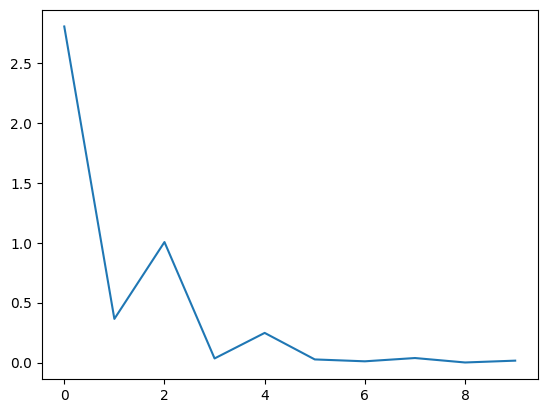

In [14]:
plt.plot(range(epoch), losses)

<Axes: >

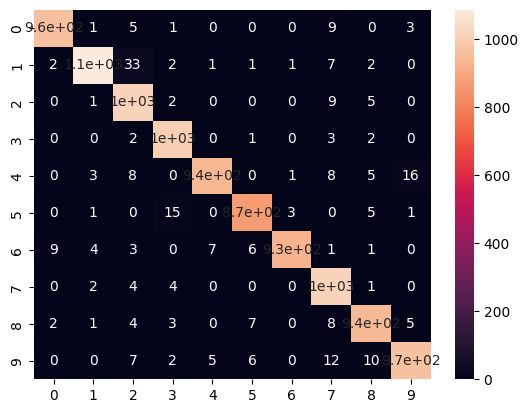

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
with torch.no_grad():
    y_pred = []
    for b, (X_test, y_test) in enumerate(test_loader):
        y_val = model(X_test)
        _, predicted = torch.max(y_val, 1)
        y_pred.extend(predicted.tolist())

y_test_all = test_dataset.targets.tolist()
cm = confusion_matrix(y_test_all, y_pred)
sn.heatmap(cm, annot=True)


In [20]:
y_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 5,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 2,
 1,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 2,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 5,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 2,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [21]:
()

array([ True,  True,  True, ...,  True,  True,  True])

In [23]:
accuracy = (np.array(y_pred) == np.array(y_test_all)).sum().item() / len(y_test_all) * 100
print(f"Accuracy: {accuracy}%")


Accuracy: 97.27%
